In [1]:
#1. Import and warehouse data:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d1=pd.read_csv('TelcomCustomer-Churn.csv') #This includes both csv files combined
d=d1.copy()

In [3]:
print(d.shape)
d

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
#2. Data cleansing:
d.isnull().any() #There are no null values

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
print('Number of unique values of each parameter:')
d.nunique() #CustomerID column is unqiue string set 

Number of unique values of each parameter:


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
#TotalCharges should be in float type, other object type columns to be converted to numerical values
# d['TotalCharges']=d['TotalCharges'].astype(float) threw error due to one value that is not type castable (' ')

l=np.array([])
for i in range(len(d.TotalCharges)):
    if d.TotalCharges.iloc[i]==' ':
        l=np.append(l,i)
l=l.astype(int)
l

array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754])

In [8]:
m=d.drop(l).TotalCharges.median() #Taking the median of non null values

In [9]:
d.iloc[l,19]=m  #Imputing empty strings with median value
d.iloc[l]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,1397.47,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,1397.47,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,1397.47,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,1397.47,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,1397.47,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,1397.47,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,1397.47,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,1397.47,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,1397.47,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,1397.47,No


In [10]:
d['TotalCharges']=d['TotalCharges'].astype(float)

In [11]:
d.drop('customerID',axis=1,inplace=True) #CustomerID column is unqiue string set and is not required for the model

In [12]:
d.columns[d.dtypes==object]  #These columns need to be converted to numerical values later on after data analysis

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [13]:
#3. Data analysis & visualisation:
d.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2281.916928,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2265.270398,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,402.225000,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


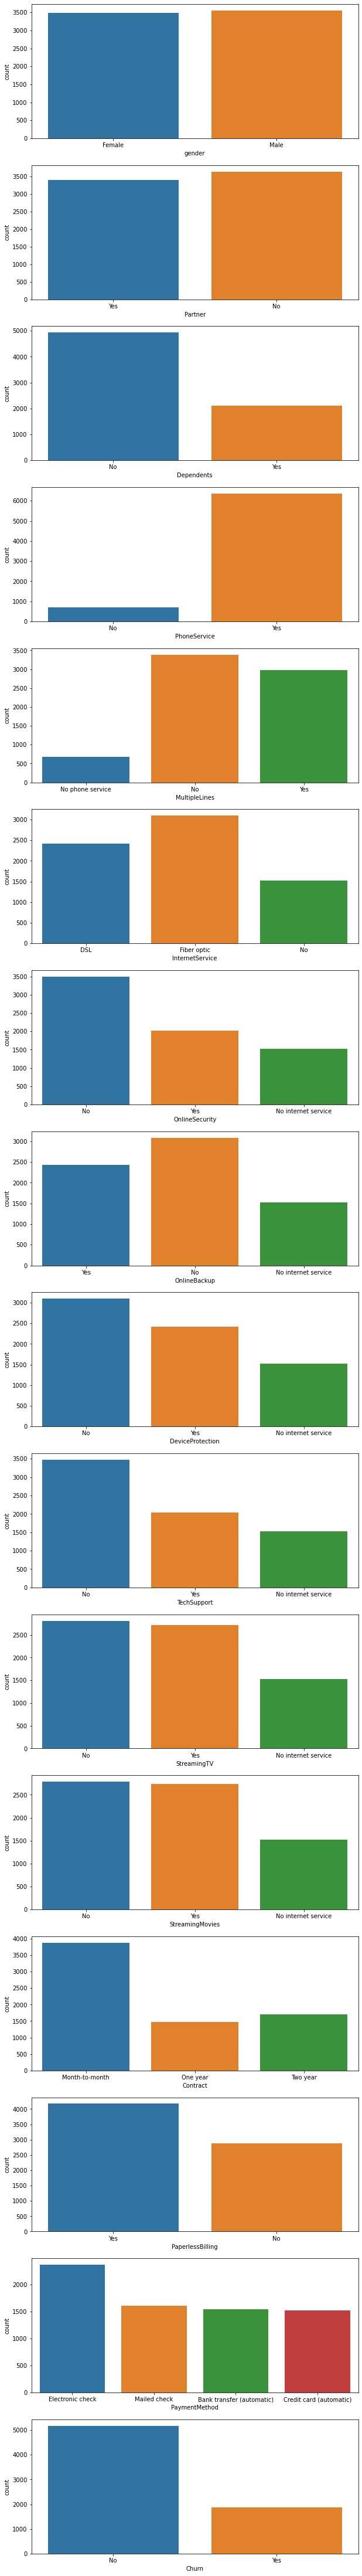

In [14]:
#Univariate analysis of categorical variables
j = (i for i in range(16)) #Generator for auto incrementing axis index
f,a=plt.subplots(16,figsize=(10,80))
for i in d.loc[:,d.columns[d.dtypes==object]]:
    sns.countplot(x=d[i],ax=a[next(j)])
plt.show()

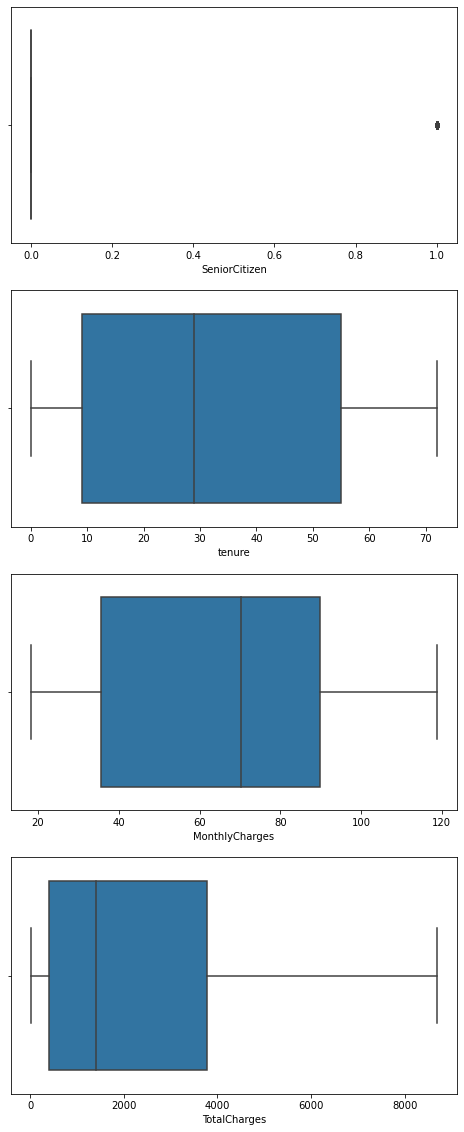

In [15]:
#Univariate analysis of numerical variables
j = (i for i in range(4)) #Generator for auto incrementing axis index
f,a=plt.subplots(4,figsize=(8,20))
for i in d.loc[:,d.columns[(d.dtypes=='int64') | (d.dtypes=='float64')]]:
    sns.boxplot(x=d[i],ax=a[next(j)])
plt.show()

C:\Users\aravindhsm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


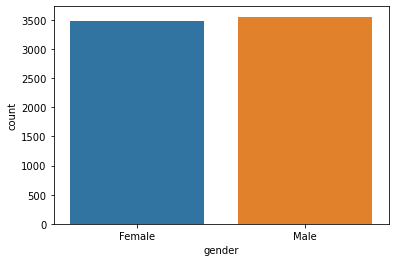

In [16]:
sns.countplot(d.gender) #Boxplot didn't give much insight on gender column since it has just 2 classes



It can be seen that there is huge variation in all 3 parameters based on Churn or Non churn


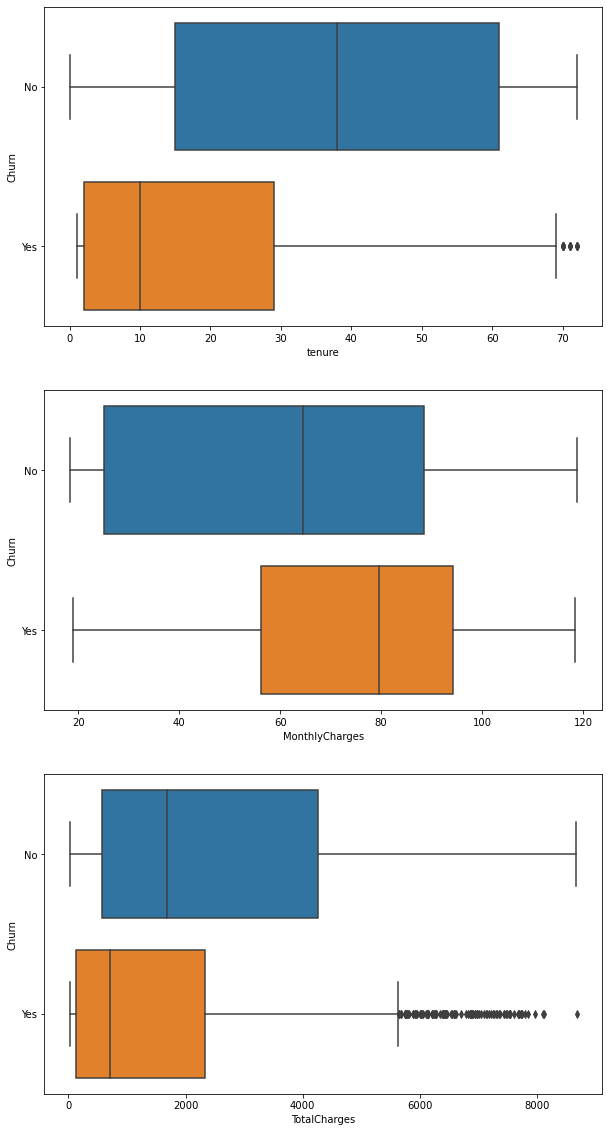

In [17]:
#Bivariate analysis of numerical variables
j = (i for i in range(4))
f,a=plt.subplots(3,figsize=(10,20))
for i in d[['tenure','MonthlyCharges','TotalCharges']]:
    sns.boxplot(x=d[i],ax=a[next(j)],y='Churn',data=d)
print('\n\nIt can be seen that there is huge variation in all 3 parameters based on Churn or Non churn')

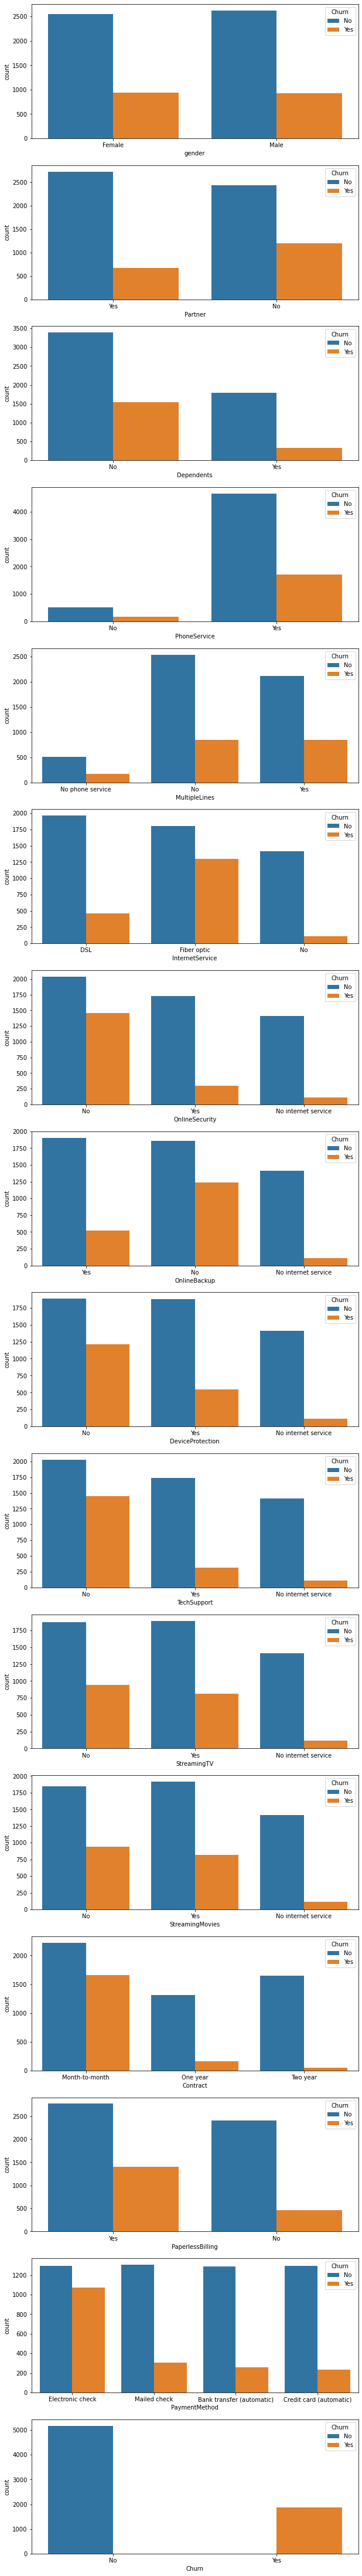

In [18]:
#Bivariate analysis of categorical variables
j = (i for i in range(16))
f,a=plt.subplots(16,figsize=(10,80))
for i in d.columns[d.dtypes==object]:
    sns.countplot(x=d[i],ax=a[next(j)],hue='Churn',data=d)

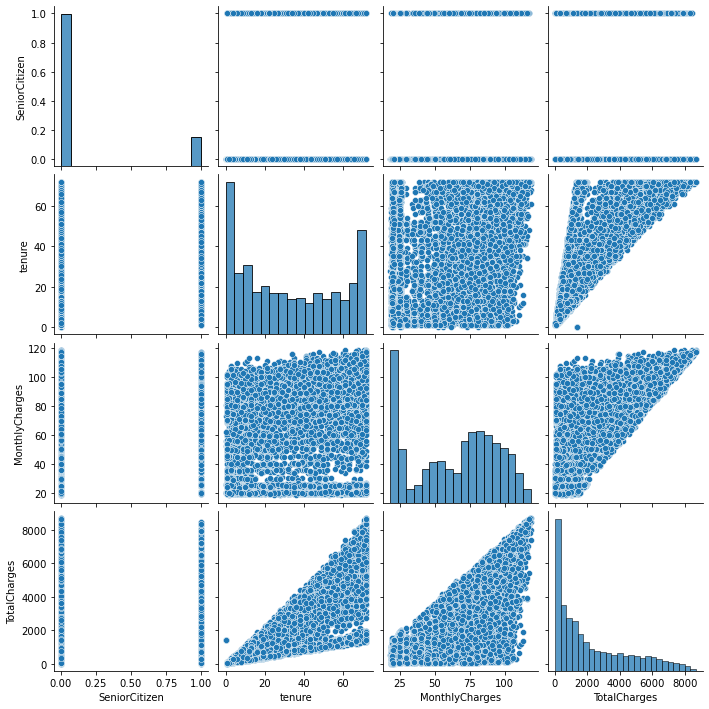

In [19]:
sns.pairplot(d)

In [20]:
d.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


In [21]:
#Converting objects to numerical values:
d.replace({"Contract":{"Month-to-month":1,"One year":2,"Two year":3}},inplace=True) #Ordering is required
d.Contract.dtype #Automatically converted to int type

dtype('int64')

In [22]:
cols=list(d.columns[d.dtypes==object])
cols.pop()
cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'PaymentMethod']

In [23]:
d=pd.get_dummies(d,columns=cols,drop_first=True)
d 
#SeniorCitizen column can have ordered integer as present already, since it depends ordered age group

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,29.85,29.85,No,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,2,56.95,1889.50,No,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,2,1,53.85,108.15,Yes,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0,45,2,42.30,1840.75,No,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,2,1,70.70,151.65,Yes,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,2,84.80,1990.50,No,1,1,1,1,...,0,1,0,1,0,1,1,0,0,1
7039,0,72,2,103.20,7362.90,No,0,1,1,1,...,0,0,0,1,0,1,1,1,0,0
7040,0,11,1,29.60,346.45,No,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,1,74.40,306.60,Yes,1,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [24]:
#Target variable:
d.replace({"Churn":{"Yes":1,"No":0}},inplace=True)
d #Final dataset

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,29.85,29.85,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,2,56.95,1889.50,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,2,1,53.85,108.15,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0,45,2,42.30,1840.75,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,2,1,70.70,151.65,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,2,84.80,1990.50,0,1,1,1,1,...,0,1,0,1,0,1,1,0,0,1
7039,0,72,2,103.20,7362.90,0,0,1,1,1,...,0,0,0,1,0,1,1,1,0,0
7040,0,11,1,29.60,346.45,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,1,74.40,306.60,1,1,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [25]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   Contract                               7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7043 non-null   float64
 5   Churn                                  7043 non-null   int64  
 6   gender_Male                            7043 non-null   uint8  
 7   Partner_Yes                            7043 non-null   uint8  
 8   Dependents_Yes                         7043 non-null   uint8  
 9   PhoneService_Yes                       7043 non-null   uint8  
 10  MultipleLines_No phone service         7043 non-null   uint8  
 11  Mult

In [26]:
#4. Data pre-processing:
y=d.Churn
X=d.drop('Churn',axis=1)
print(X.shape,y.shape)

(7043, 29) (7043,)


In [27]:
y.value_counts() #There is imbalance in target variable

0    5174
1    1869
Name: Churn, dtype: int64

In [28]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X=pd.concat([X_train,y_train],axis=1)
Churn_upsampled=resample(X[X.Churn==1],replace=True,n_samples=len(X[X.Churn==0]),random_state=1)
upsampled=pd.concat([X[X.Churn==0],Churn_upsampled])
upsampled.Churn.value_counts()
#Upsampled and balanced target variable

1    3589
0    3589
Name: Churn, dtype: int64

In [29]:
y_train=upsampled.Churn
X_train=upsampled.drop('Churn',axis=1)
print(X_train.shape,y_train.shape)

(7178, 29) (7178,)


In [30]:
X_train.describe()

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,...,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000
mean,0.200056,27.813597,1.514628,67.932836,2058.441467,0.502508,0.442742,0.252856,0.907216,0.092784,...,0.168571,0.245890,0.168571,0.394817,0.168571,0.410142,0.639454,0.190443,0.414043,0.206186
std,0.400070,24.074667,0.770517,28.930545,2203.753739,0.500029,0.496745,0.434679,0.290149,0.290149,...,0.374398,0.430644,0.374398,0.488846,0.374398,0.491894,0.480192,0.392678,0.492590,0.404593
min,0.000000,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,1.000000,45.650000,270.625000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,21.500000,1.000000,74.650000,1157.050000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,49.000000,2.000000,90.650000,3309.862500,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,3.000000,118.650000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
X_test.describe()

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,0.162328,32.735920,1.711311,64.692901,2293.679307,0.509229,0.499763,0.313772,0.901562,0.098438,...,0.214387,0.299101,0.214387,0.385234,0.214387,0.376716,0.589210,0.207288,0.335542,0.226692
std,0.368839,24.570155,0.844966,30.009194,2256.949581,0.500033,0.500118,0.464135,0.297977,0.297977,...,0.410494,0.457972,0.410494,0.486766,0.410494,0.484677,0.492094,0.405460,0.472291,0.418791
min,0.000000,0.000000,1.000000,18.700000,19.150000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,1.000000,36.150000,417.750000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,1.000000,70.250000,1406.900000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,56.000000,3.000000,89.900000,3815.400000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,3.000000,118.750000,8672.450000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
#There are few variations between the statistics of test and train dataset but mostly close and similar in all parameters

In [33]:
#5. Model training, testing and tuning:
#Decision tree using Entropy method
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
print(dt_model.score(X_test,y_test))
y_pred=dt_model.predict(X_test)
confusion_matrix(y_test, y_pred)

0.747278750591576


array([[1316,  269],
       [ 265,  263]], dtype=int64)

In [35]:
#Importance of each feature
pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).T

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Imp,0.015063,0.092977,0.187067,0.223695,0.203785,0.029343,0.022146,0.018415,0.000771,0.002011,...,0.0,0.016976,0.0,0.016695,0.0,0.01443,0.021215,0.010117,0.014032,0.013232


In [36]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 10, min_samples_leaf=10,random_state=1)
rfcl = rfcl.fit(X_train, y_train)
y_pred = rfcl.predict(X_test)
print(rfcl.score(X_test , y_test))
confusion_matrix(y_test, y_pred)

0.7690487458589683


array([[1202,  383],
       [ 105,  423]], dtype=int64)

In [37]:
#Applying Adaboost
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=25,random_state=1)
abcl = abcl.fit(X_train, y_train)
y_pred = abcl.predict(X_test)
print(abcl.score(X_test , y_test))
confusion_matrix(y_test, y_pred)

0.7501183151916706


array([[1350,  235],
       [ 293,  235]], dtype=int64)

In [38]:
#Applying Bagging classifier
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=20, max_samples= .7, bootstrap=True,random_state=1)
bgcl = bgcl.fit(X_train, y_train)
y_pred = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))
confusion_matrix(y_test, y_pred)

0.7775674396592522


array([[1318,  267],
       [ 203,  325]], dtype=int64)

In [39]:
#Applying GradientBoost
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 80, learning_rate = 0.09,random_state=1)
gbcl = gbcl.fit(X_train, y_train)
y_pred = gbcl.predict(X_test)
print(gbcl.score(X_test , y_test))
confusion_matrix(y_test, y_pred)

0.7624230951254141


array([[1181,  404],
       [  98,  430]], dtype=int64)

In [40]:
#Checking only the test accuracy since train accuracy will be very high in decision tree models and final decision is to be made based on test accuracy.

The highest accuracy is for Bagging classifier followed by Random forest and Gradient Boost.
But Random forest can be taken as final model here since the aim of the model here is to *reduce the False Negatives*, which is done well by Random Forest. Even though Gradient Boost has least False negatives, the False positives are relatively high in it, which will lead to higher cost in marketing campaigns targetted to many more customers than necessary.

In [41]:
#Pickle the selected model for future use
import pickle
file = open('Churn_rf.pkl', 'wb')
pickle.dump(rfcl, file) #Model is saved for reusing later

In [42]:
#Testing model saved:
model = open('Churn_rf.pkl','rb')
forest = pickle.load(model)
y_prediction = forest.predict(X_test)
confusion_matrix(y_test, y_prediction)

#Model loads properly

array([[1202,  383],
       [ 105,  423]], dtype=int64)

In [43]:
#6. GUI development: 
from tkinter import *
infile = open("Churn_rf.pkl",'rb')
new_dict = pickle.load(infile)
model = pickle.load(open("Churn_rf.pkl", "rb"))

In [44]:
def prediction():
    Gender=gender_listbox.get(gender_listbox.curselection())
    if gender=='Male':
        Male=1
        Female=0
    elif gender=='Female':
        Male=0
        Female=1
    else:
        Male=0
        Female=0
        
    Partner=partner_listbox.get(partner_listbox.curselection())
    if Partner=='Yes':
        Yes=1
        No=0
    elif Partner=='No':
        Yes=0
        No=1
    else:
        Yes=0
        No=0
    
    tenure_duration=IntVar()
    tenure=tenure_duration.get()
    
    Monthly=IntVar()
    MonthlyCharges=Monthly.get()
    
    Total=IntVar()
    TotalCharges=Total.get()

master = Tk()
    
#GUI is incomplete

### 7. Conclusion and improvisation:
We can see significant improvement in tuning the model and in ensembling compared to decision tree base model.
Eventhough Bagging classifier provides better accuracy score, the value to be noted is lesser False Negative.
Hence Random Forest classifier is the best model is used as final model to predict customer churning and target them with better marketing campaigns.

Feature importance can be looked into, in order to determine which parameters to feed into the model and can be fune tuned further. Model can also be fine tuned by trying out different n_estimators, criteria, learning_rate to find peak accuracy.
Different base models can also be tried out and could be ensembled with different combinations.

Quality, quantity, variety, velocity, veracity are sufficient, all the information needed is provided in detail in the dataset.